# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.187627e+01     6.725920e+00
 * time: 0.005039215087890625
     1     2.950014e+01     5.402634e+00
 * time: 0.014706134796142578
     2     2.308047e+01     8.838317e+00
 * time: 0.03882718086242676
     3     1.516525e+01     3.779754e+00
 * time: 0.06838703155517578
     4     1.168043e+01     2.393094e+00
 * time: 0.09224200248718262
     5     1.061378e+01     1.085074e+00
 * time: 0.1135861873626709
     6     1.036570e+01     3.162873e+00
 * time: 0.13172507286071777
     7     9.509968e+00     9.800017e-01
 * time: 0.1496891975402832
     8     9.207504e+00     7.120268e-01
 * time: 0.16745710372924805
     9     9.085357e+00     2.219592e+00
 * time: 0.180495023727417
    10     8.928525e+00     1.115219e+00
 * time: 0.19798707962036133
    11     8.830722e+00     1.424828e+00
 * time: 0.21114110946655273
    12     8.715444e+00     8.363265e-01
 * time: 0.22447705268859863
    13     8.623793e+00     4.826363e-01
 * time: 0

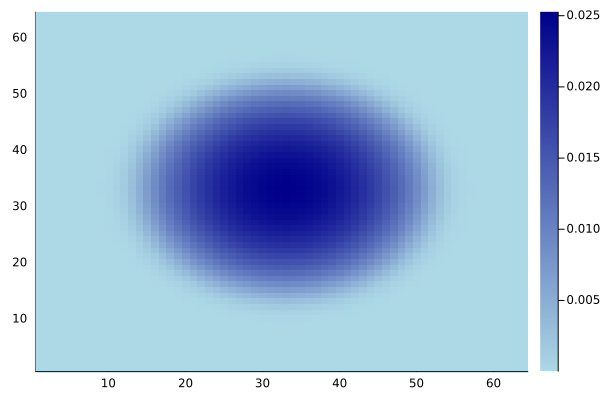

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)